In [28]:
import os
import re
import glob
import matplotlib.pyplot as plt
import numpy as np

test_cases  = ['art', 'streamcluster']
target_file = "stats.txt"
energy      = r"Total energy \(J\)\s*:\s*([0-9.eE+-]+)"
latency     = r"Time \(s\)\s*:\s*([0-9.eE+-]+)"
num_core    = r"Cores\s*:\s*([0-9]+)"


In [29]:
# get latency and energy
def get_stats(subfolder, ):
    latency_all     = []
    energy_all      = []
    core_all        = []
    config_all      = []
    for t in range(len(test_cases)):
        prefix = test_cases[t]
        pattern = f"./pa1_3/{subfolder}/{prefix}*/"
        folders = [d for d in glob.glob(pattern) if os.path.isdir(d)]
        latency_case_ = []
        energy_case_  = []
        core_case_    = []
        config_       = []
        for folder in folders:
            file_path = os.path.join(folder, target_file)
            if not os.path.exists(file_path):
                print(f"Missing: {file_path}")
                continue

            with open(file_path, "r") as f:
                for line in f:
                    match = re.search(num_core, line)
                    if match:
                        value = float(match.group(1))
                        # print(f"{folder}: {value}")
                        core_case_.append(value)
                        break
                for line in f:
                    match = re.search(latency, line)
                    if match:
                        value = float(match.group(1))
                        # print(f"{folder}: {value}")
                        latency_case_.append(value)
                        break
                for line in f:
                    match = re.search(energy, line)
                    if match:
                        value = float(match.group(1))
                        # print(f"{folder}: {value}")
                        energy_case_.append(value)
                        break
                
            # get arguments as well
            info = folder.split("_")   
            config = {
                "l3size": float(info[13]),
                "l3rep": info[15],
                "dram_rank": float(info[17]),
                "dram_tech": info[18][:-1]
            }
            config_.append(config)

        latency_all.append(latency_case_)
        energy_all.append(energy_case_)
        core_all.append(core_case_)
        config_all.append(config_)
    return latency_all, energy_all, core_all, config_all

art [1.5973     1.66237647 1.66345882 1.60287647 1.63445294 1.59252941
 1.56648824 1.42954706 1.26439412 0.48332353 0.55359412 0.66763529]
streamcluster [1.07892353 1.07861176 1.07938824 1.07546471 1.07530588 1.07615294
 1.07908824 1.07856471 1.07977647 1.07146471 1.07258235 1.07458824]
art [41.07285099 42.43666313 42.45899039 43.11256683 43.80213285 42.85292598
 45.91143338 42.54632745 38.44690934 21.62488972 23.6447308  26.90701119]
streamcluster [29.21895335 29.21249    29.2285561  30.38959639 30.38559246 30.40421932
 32.88370953 32.8702076  32.89949738 37.43319677 37.4643087  37.52064379]


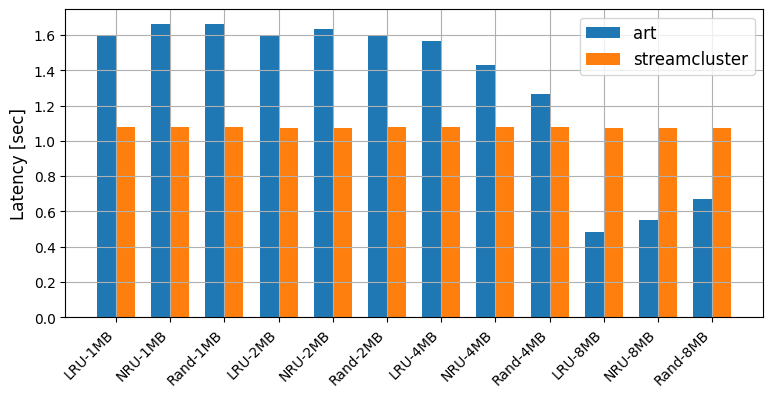

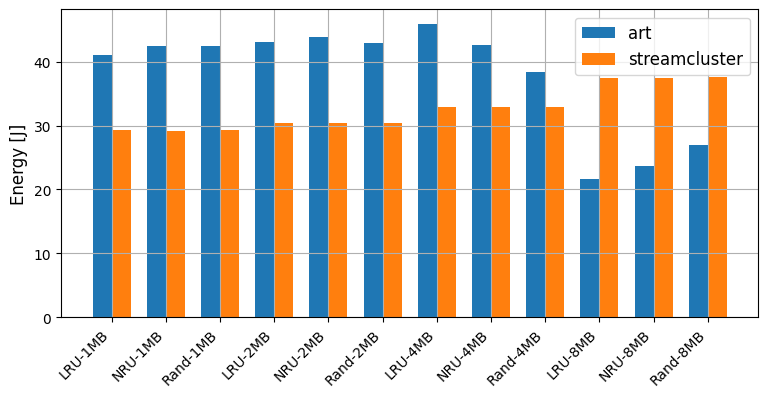

In [61]:
latency_all_a, energy_all_a, core_all_a, config_all_a = get_stats('pa1-3a', )
# [1] Plot latency
fig, ax = plt.subplots(figsize=(9,4))
width = 0.35
offset = [-width/2, width/2]


for n in range(2):
    config_n    = config_all_a[n]
    l3_size_n   = [int(config_n[i]['l3size']/1024) for i in range(len(config_n))]
    l3_rep_n    = [config_n[i]['l3rep'] for i in range(len(config_n))]
    x = np.arange(len(config_n))

    latency_n   = np.array(latency_all_a[n])
    sorted_data = sorted(zip(l3_size_n, l3_rep_n, latency_n))
    sorted_l3_size_n, sorted_l3_rep_n, sorted_latency_n = zip(*sorted_data)
    sorted_l3_n = [sorted_l3_rep_n[i]+'-'+str(sorted_l3_size_n[i])+'MB' for i in range(len(config_n))]
    ax.bar(x+offset[n], sorted_latency_n, width, label=test_cases[n])
    print(test_cases[n], np.array(sorted_latency_n))
ax.set_xticks(x)
ax.set_xticklabels(sorted_l3_n, rotation=45, ha='right')
# plt.xlabel('DRAM Config', fontsize = 12)
plt.ylabel('Latency [sec]', fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()
plt.savefig('./figures/pa1-3a-latency.png', bbox_inches='tight')


# [2] Plot energy
fig, ax = plt.subplots(figsize=(9,4))
for n in range(2):
    config_n    = config_all_a[n]
    l3_size_n   = [int(config_n[i]['l3size']/1024) for i in range(len(config_n))]
    l3_rep_n    = [config_n[i]['l3rep'] for i in range(len(config_n))]
    x = np.arange(len(config_n))

    energy_n   = np.array(energy_all_a[n])
    sorted_data = sorted(zip(l3_size_n, l3_rep_n, energy_n))
    sorted_l3_size_n, sorted_l3_rep_n, sorted_energy_n = zip(*sorted_data)
    sorted_l3_n = [sorted_l3_rep_n[i]+'-'+str(sorted_l3_size_n[i])+'MB' for i in range(len(config_n))]
    ax.bar(x+offset[n], sorted_energy_n, width, label=test_cases[n])
    print(test_cases[n], np.array(sorted_energy_n))
ax.set_xticks(x)
ax.set_xticklabels(sorted_l3_n, rotation=45, ha='right')
plt.ylabel('Energy [J]', fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()
plt.savefig('./figures/pa1-3a-energy.png', bbox_inches='tight')

art [1.85289412 1.66884118 1.60287647 1.3927     1.61392353 1.38713529
 1.57831176 1.33940588]
streamcluster [1.10042941 1.07645882 1.07546471 1.05241176 1.07542353 1.05242941
 1.06607059 1.04255294]
art [48.39272199 45.35463138 43.11256683 39.39319948 43.35685471 39.26693174
 42.59493701 38.25197266]
streamcluster [30.91653788 30.93944317 30.38959639 30.42012523 30.38871272 30.4204575
 30.19129203 30.20716376]


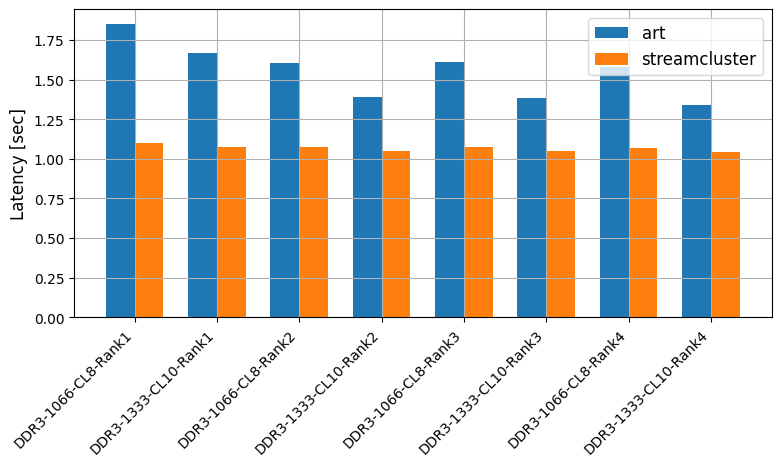

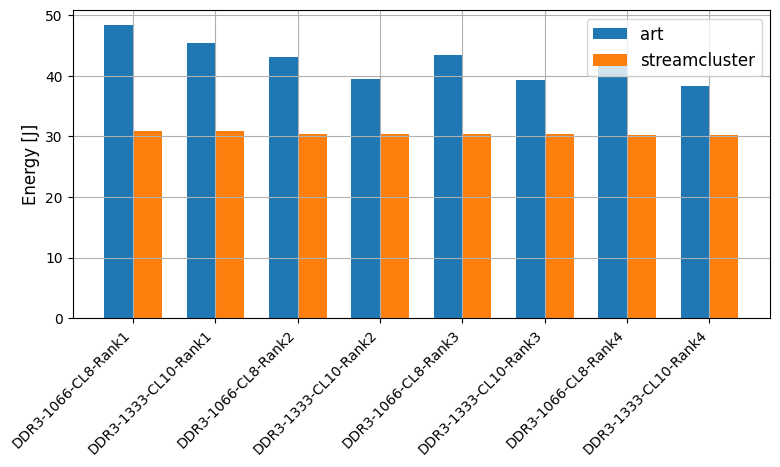

In [62]:
latency_all_c, energy_all_c, core_all_c, config_all_c = get_stats('pa1-3c', )
# [1] Plot latency
fig, ax = plt.subplots(figsize=(9,4))
width = 0.35
offset = [-width/2, width/2]


for n in range(2):
    config_n    = config_all_c[n]
    dram_rank_n = [int(config_n[i]['dram_rank']) for i in range(len(config_n))]
    dram_tech_n = [config_n[i]['dram_tech'] for i in range(len(config_n))]
    x = np.arange(len(config_n))

    latency_n   = np.array(latency_all_c[n])
    sorted_data = sorted(zip(dram_rank_n, dram_tech_n, latency_n))
    sorted_dram_rank_n, sorted_dram_tech_n, sorted_latency_n = zip(*sorted_data)
    sorted_dram_n = [sorted_dram_tech_n[i]+'-Rank'+str(sorted_dram_rank_n[i]) for i in range(len(config_n))]
    ax.bar(x+offset[n], sorted_latency_n, width, label=test_cases[n])
    print(test_cases[n], np.array(sorted_latency_n))
ax.set_xticks(x)
ax.set_xticklabels(sorted_dram_n, rotation=45, ha='right')
# plt.xlabel('DRAM Config', fontsize = 12)
plt.ylabel('Latency [sec]', fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()
plt.savefig('./figures/pa1-3c-latency.png', bbox_inches='tight')


# [2] Plot energy
fig, ax = plt.subplots(figsize=(9,4))
for n in range(2):
    config_n    = config_all_c[n]
    dram_rank_n = [int(config_n[i]['dram_rank']) for i in range(len(config_n))]
    dram_tech_n = [config_n[i]['dram_tech'] for i in range(len(config_n))]
    x = np.arange(len(config_n))

    energy_n   = np.array(energy_all_c[n])
    sorted_data = sorted(zip(dram_rank_n, dram_tech_n, energy_n))
    sorted_dram_rank_n, sorted_dram_tech_n, sorted_energy_n = zip(*sorted_data)
    sorted_dram_n = [sorted_dram_tech_n[i]+'-Rank'+str(sorted_dram_rank_n[i]) for i in range(len(config_n))]
    ax.bar(x+offset[n], sorted_energy_n, width, label=test_cases[n])
    print(test_cases[n], np.array(sorted_energy_n))
ax.set_xticks(x)
ax.set_xticklabels(sorted_dram_n, rotation=45, ha='right')
plt.ylabel('Energy [J]', fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()
plt.savefig('./figures/pa1-3c-energy.png', bbox_inches='tight')
